# problem 0

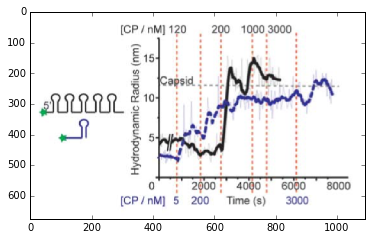

In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
img=mpimg.imread('problem0.png')
plt.imshow(img)

On the left it shows two RNA fragments with different length. The figure tries to compare how the two RNA induce the formation a protein capsid under different concentration. It did well in labeling, making the reader clearly know how to match the data with the object. However, I feel it includes too much imformation without sufficient clarificaiton in the figure. For example, it has three x axis but it looks confusing to me whether the concentraion and time are independent or corelated. Also, the concentration tick labels are different but it uses the orange dashed line to align them. It is unclear what these grid lines are drawn for. I think it can broke down into two figures to resolve those confusion. There was a gap in the concentration of the black line, which I do not think is necessary.

# problem 1

In [2]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

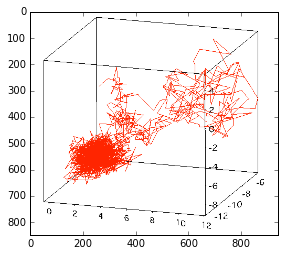

In [3]:
img=mpimg.imread('jd.png')
plt.imshow(img)

The original plot shows how one atom move reletive to another atom at the origin with respect to time. The trajectory ends up with a tight cluster, showing after a certain period of time, the atom reaches an equilibrated state. I tried to improve this plot by changing the path plot to a scatter plot and reduced the transpanrency of the dots. Consequently, the darker one area is, the more probability the atom will stay in that area. Also, I colormapped the dots with respect to time, so it can directly tell that at the very beginning stage, the movement of atom is very random, when it reaches a favorable state, it will just fluctuate around that state. The matplotlib notebook makes the plot interactive and the I can easily rotate the plot to get a better understanding of the spatical distribution.

<IPython.core.display.Javascript object>


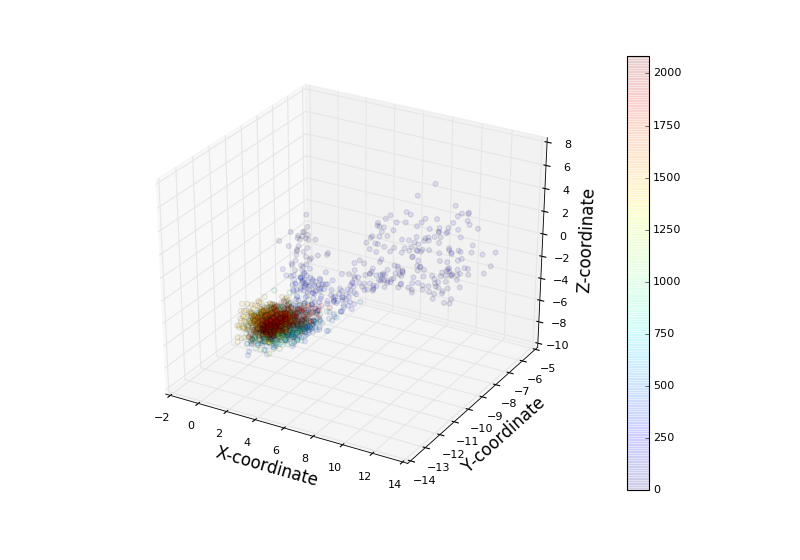

In [5]:
%matplotlib notebook
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
dt = [('x', int), ('y', float), ('z', float)]
position = pd.read_excel('C343_Et_ipr.xls', header = None, names = ['x', 'y', 'z'], skiprows = 1)
fig = plt.figure(figsize = (10,7))
axx = fig.add_subplot(111, projection='3d')
scat = axx.scatter(position['x'], position['y'], position['z'], zdir = 'z', alpha = 0.1, c = position.index)
fig.colorbar(scat)
axx.set_xlabel('X-coordinate', fontsize = 15)
axx.set_ylabel('Y-coordinate', fontsize = 15)
axx.set_zlabel('Z-coordinate', fontsize = 15)


# problem 2

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
dt1 = [('date', int), ('value', float)]
dt2 = [('date', int), ('temp', float)]
google = np.loadtxt('google_data.txt', dt1, skiprows = 1)
yahoo = np.loadtxt('yahoo_data.txt', dt1, skiprows = 1)
ny = np.loadtxt('ny_temps.txt', dt2, skiprows = 1)

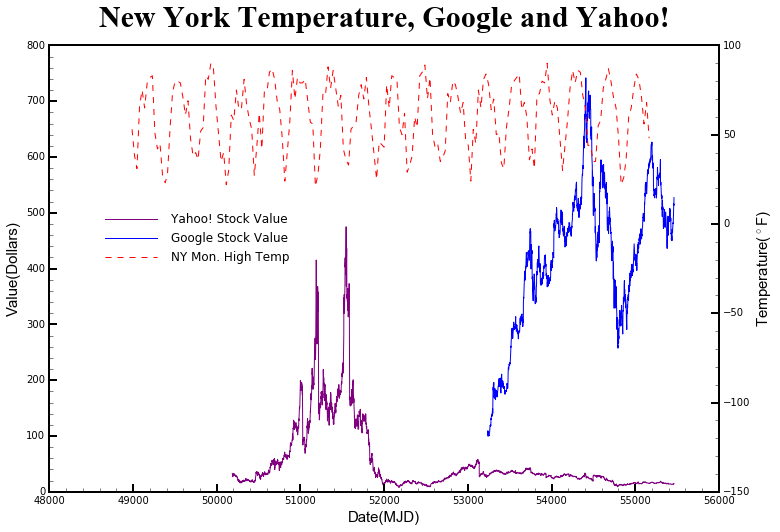

In [7]:
fig, ax0 = plt.subplots(1, 1, figsize = (12,8))
ax0.set_title('New York Temperature, Google and Yahoo!', fontsize = 30, fontname = 'Times New Roman')
ax0.title.set_y(1.03)
#ax0.title.set_fontsize(28)
lns1 = ax0.plot(yahoo['date'], yahoo['value'], color = 'purple', label = 'Yahoo! Stock Value')
lns2 = ax0.plot(google['date'], google['value'], color = 'blue', label = 'Google Stock Value')
ax0.set_xlabel('Date(MJD)', fontsize = 15, fontname = 'Arial')
ax0.set_ylabel('Value(Dollars)', fontsize = 15, fontname = 'Arial')
ax0.spines['top'].set_linewidth(2)
ax0.spines['bottom'].set_linewidth(2)
ax0.spines['left'].set_linewidth(2)
ax0.spines['right'].set_linewidth(2)
ax0.minorticks_on()
ax0.tick_params(axis='x', which='major', labelsize=10, length = 8, width = 2, top = 'off')
ax0.tick_params(axis='x', which='minor', length = 4, top = 'off')
ax0.tick_params(axis='y', which='major', labelsize=10, length = 8, width = 2, right = 'off')
ax0.tick_params(axis='y', which='minor', length = 4, right = 'off')


ax0.set_ylabel('Value(Dollars)', fontsize = 15, fontname = 'Arial')
ax1 = ax0.twinx()
lns3 = ax1.plot(ny['date'], ny['temp'], ls = 'dashed', color = 'red', label = 'NY Mon. High Temp')
ax1.set_ylim(-150,100)
ax1.set_ylabel('Temperature($^\circ$F)', fontsize = 15, fontname = 'Arial')
ax1.minorticks_on()
ax1.tick_params(axis='y', which='major', labelsize=10, length = 8, width = 2, left = 'off')
ax1.tick_params(axis='y', which='minor', length = 4, left = 'off')
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=(0.07, 0.5), frameon = False, handlelength = 5)

# problem 3

In [8]:

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd

class drawrect:
    def __init__(self, fig, axarr, data):
        self.fig = fig
        self.axarr = axarr
        self.data = data
        self.length = len(data.columns) - 1
        self.ax = None
        self.rect = None
        self.x0 = None
        self.y0 = None
        self.x1 = None
        self.y1 = None
        
        self.fig.canvas.mpl_connect('button_press_event', self.on_press)
        self.fig.canvas.mpl_connect('button_release_event', self.on_release)
        self.fig.canvas.mpl_connect('key_press_event', self.on_keyd)
        
        dmax = []
        dmin = []
        for i in data.columns:
            dmax.append(np.max(data[i]))
            dmin.append(np.min(data[i]))
        for i in range(self.length):
            axarr[0, i].set_xlim(dmin[3-i], dmax[3-i])
            axarr[i, 0].set_ylim(dmin[i], dmax[i])
        
        # Colorarr was generated to record the color of each datapoint
        self.colorarr = []
        self.colordict = {'setosa':'red', 'versicolor':'green', 'virginica':'blue' }
        for i in data[data.columns[-1]]:
            self.colorarr.append(self.colordict[i])
            
        
        # Seld.findaxes is a dictionary which corelates the axes and its x, y axis information
        self.findaxes = {}
        for y_subplot in range(self.length):
            for x_subplot in range(self.length):
                self.findaxes.update({
                        str(axarr[y_subplot, x_subplot]):[data.columns[3 - x_subplot], data.columns[y_subplot]]
                                                          })

        # Plot the input data
        self.scatlist = []
        for i in range(self.length):
            for j in range(self.length):
                scat = self.axarr[i,j].scatter(
                    self.data[self.findaxes[str(self.axarr[i,j])][0]], self.data[self.findaxes[str(self.axarr[i,j])][1]], 
                    color = self.colorarr, alpha = 0.3
                                                         )
                self.scatlist.append(scat)
                self.axarr[i, j].tick_params(axis='both', which='major', labelsize=8)
        
        self.scatarr = np.asarray(self.scatlist).reshape(self.length, self.length)        
        self.fig.canvas.draw()
        

    def on_press(self, event):
        if not self.x0:
            self.x0 = event.xdata
            self.y0 = event.ydata
            self.ax = event.inaxes

    def on_release(self, event):
        if not self.rect:
            self.x1 = event.xdata
            self.y1 = event.ydata
            self.rect = Rectangle((self.x0, self.y0), self.x1 - self.x0, self.y1 - self.y0, color = 'orange', alpha = 0.3)
            self.ax.add_patch(self.rect)
            self.update_color(self.data)
            
            
            
    
    def on_keyd(self, event):
        if event.key == 'd':
            self.ax.patches.pop()
            self.fig.canvas.draw()
            self.ax = None
            self.rect = None
            self.x0 = None
            self.y0 = None
            self.x1 = None
            self.y1 = None
            self.update_plot(self.colorarr)
    
    def update_color(self, data):
        if self.rect:
            new_colorarr = np.copy(self.colorarr)
            xmin = min(self.x0, self.x1)
            xmax = max(self.x0, self.x1)
            ymin = min(self.y0, self.y1)
            ymax = max(self.y0, self.y1)
            x_now = self.findaxes[str(self.ax)][0]
            y_now = self.findaxes[str(self.ax)][1]
            for n in range(len(data[x_now])):
                if not ((xmin <= data[x_now][n] <= xmax) and (ymin <= data[y_now][n] <= ymax)):
                    new_colorarr[n] = 'gray'
            self.update_plot(new_colorarr)
                    
    
    def update_plot(self, color_current):
        for i in range(self.length):
            for j in range(self.length):
                self.scatarr[i][j].set_color(color_current)
        self.fig.canvas.draw()  



<IPython.core.display.Javascript object>


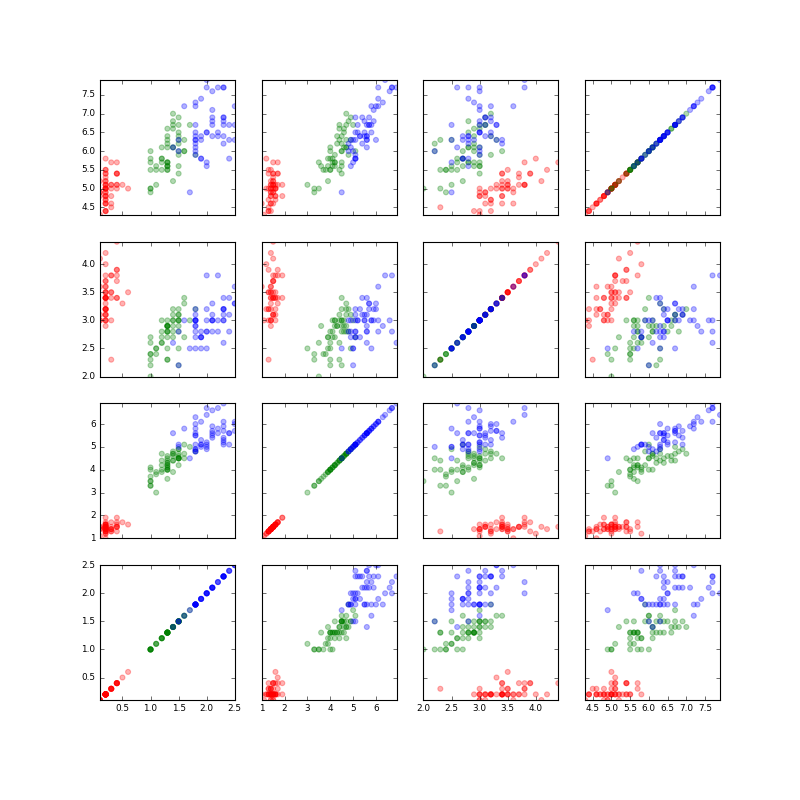

In [9]:
fig1, axarr1 = plt.subplots(4, 4, sharex="col", sharey="row", figsize=(10, 10))
data1 = pd.read_csv('flowers.csv')
a = drawrect(fig1, axarr1, data1)
plt.show()